Лабораторна робота №6
Викладача групи МІТ-31 (підгрупа 1)
Миколайчука Романа Антоновича
Мета:
Розробка та тренування нейронної мережі для класифікації рукописних цифр набору даних MNIST.

Завдання:
Завантажте набір даних MNIST:

Використовуйте TensorFlow або інші джерела для отримання набору даних.
Підготуйте дані для тренування:

Нормалізуйте зображення та розділіть їх на тренувальні та тестувальні набори.
Створіть нейронну мережу:

Розробіть нейронну мережу з використанням повнозвязних шарів.
Визначте архітектуру мережі: кількість шарів, нейронів, типи активаційних функцій.
Тренуйте модель:

Навчіть модель на тренувальному наборі даних.
Експериментуйте з різними оптимізаторами та іншими гіперпараметрами.
Оцініть ефективність моделі:

Використовуйте тестувальний набір даних для оцінки точності моделі.
Візуалізуйте деякі результати класифікації.

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2992 - accuracy: 0.9141 - val_loss: 0.1370 - val_accuracy: 0.9603
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1428 - accuracy: 0.9580 - val_loss: 0.1043 - val_accuracy: 0.9702
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1074 - accuracy: 0.9675 - val_loss: 0.0903 - val_accuracy: 0.9728
Epoch 4/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0869 - accuracy: 0.9735 - val_loss: 0.0852 - val_accuracy: 0.9750
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0748 - accuracy: 0.9767 - val_loss: 0.0821 - val_accuracy: 0.9753


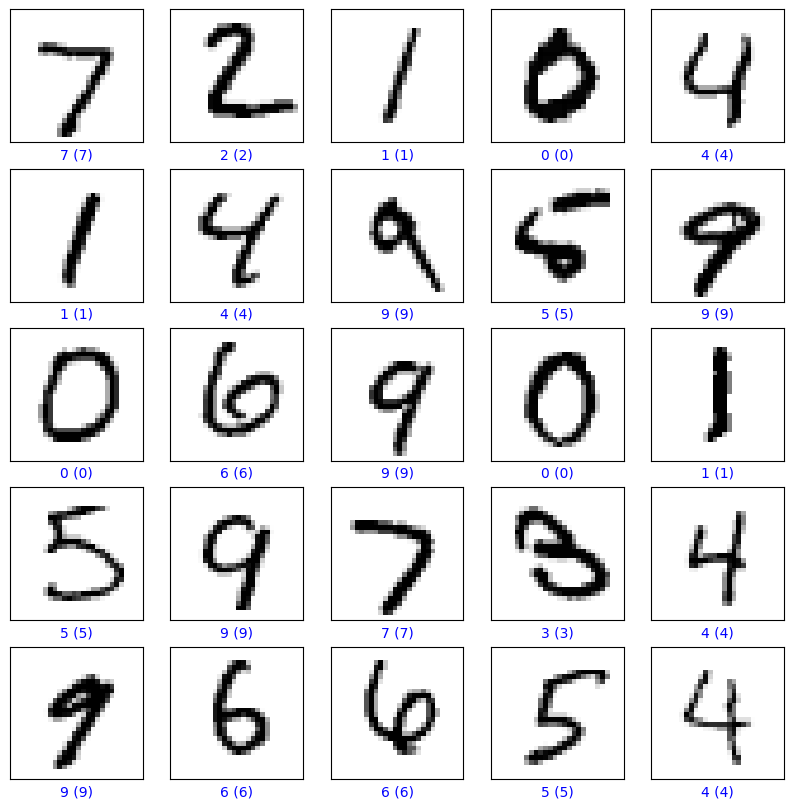

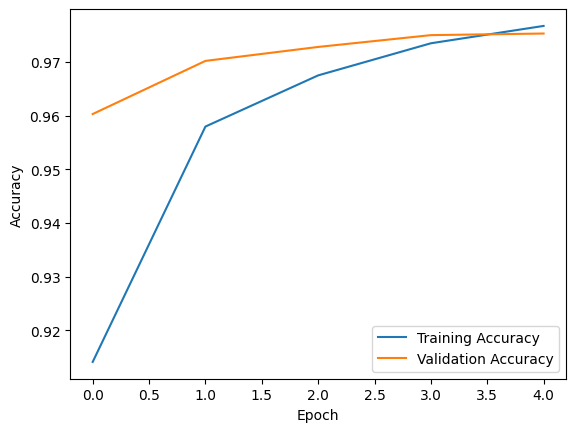

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Завантаження та підготовка даних MNIST
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Нормалізація зображень
train_images, test_images = train_images / 255.0, test_images / 255.0

# Побудова архітектури нейронної мережі
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Вирівнювання зображень
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Компіляція моделі
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Тренування моделі та збереження історії
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Візуалізація деяких результатів класифікації
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = tf.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel(f"{predicted_label} ({true_label})", color=color)
plt.show()

# Візуалізація кривих точності під час тренування
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
